In [156]:
import pandas as pd
import matplotlib.pyplot as plt

In [222]:
df = pd.read_csv("Hospital_Records.csv")


In [224]:
df = df.dropna(subset=["Age","Bill_Amount","Diagnosis"])
df = df[~df['Diagnosis'].isin(['Unknown'])]
df['Diagnosis'] = df['Diagnosis'].astype(str).str.strip().str.title()
df['Bill_Amount'] = df['Bill_Amount'].astype(str).str.strip()
df = df[df['Age'] != 'Unknown']
df = df[df['Bill_Amount'] != 'Invalid']
df['Bill_Amount'] = df['Bill_Amount'].astype(int)
df['Visit_Date'] = pd.to_datetime(df['Visit_Date'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Gender'] = df['Gender'].fillna("Other")
df['Department'] = df['Department'].fillna("Unknown")
df['Doctor_Name'] = df['Doctor_Name'].fillna("Unknown")
df['Visit_Month'] = df['Visit_Date'].dt.to_period('M')
monthly_visits = df['Visit_Month'].value_counts().sort_index()
df.head(15)

,Patient_ID,Name,Age,Gender,Department,Diagnosis,Visit_Date,Bill_Amount,Doctor_Name,Visit_Month
4,P005,John Rodriguez,25,Other,Orthopedics,Skin Rash,2023-03-31,4184,Dr. D. Johnson,2023-03
7,P008,Ethan Hernandez,14,Other,General Surgery,Appendicitis,2023-05-02,2205,Dr. C. Adams,2023-05
17,P018,Mia Jones,2,Female,Oncology,Flu,2023-04-21,2840,Dr. G. Ali,2023-04
23,P024,Sophia Gonzalez,47,Male,Orthopedics,Hypertension,2023-03-26,4707,Dr. A. Smith,2023-03
39,P040,William Garcia,1,Female,Pediatrics,Migraine,2023-05-18,1460,Dr. E. Patel,2023-05
42,P043,Michael Martinez,19,Female,Dermatology,Skin Rash,2023-03-22,2254,Dr. E. Patel,2023-03
46,P047,Sarah Jackson,36,Other,Pediatrics,Diabetes,2023-04-29,1974,Dr. C. Adams,2023-04
47,P048,James Lopez,62,Female,Neurology,Fracture,2023-06-28,746,Dr. E. Patel,2023-06
51,P052,Charlotte Anderson,7,Female,Oncology,Flu,2023-04-29,2563,Dr. B. Lee,2023-04
52,P053,Ethan Hernandez,84,Other,Oncology,Skin Rash,2023-03-31,820,Dr. D. Johnson,2023-03


In [186]:
dept_p=df["Department"].value_counts()
dept_p

Department
Pediatrics         10
General Surgery     9
Neurology           7
Oncology            6
Dermatology         6
Cardiology          6
Unknown             4
Orthopedics         4
Name: count, dtype: int64

In [187]:
common_diag = df["Diagnosis"].value_counts().head(10)
common_diag

Diagnosis
Skin Rash       9
Hypertension    9
Diabetes        8
Migraine        7
Cancer          5
Flu             4
Asthma          4
Appendicitis    4
Fracture        2
Name: count, dtype: int64

In [188]:
avg_billing = df.groupby("Department")["Bill_Amount"].mean()
avg_billing

Department
Cardiology         1979.666667
Dermatology        2859.833333
General Surgery    2486.333333
Neurology          2502.857143
Oncology           2654.333333
Orthopedics        3451.250000
Pediatrics         2718.100000
Unknown            2755.250000
Name: Bill_Amount, dtype: float64

In [211]:
t_patients= df["Patient_ID"].value_counts().sum()
t_patients




np.int64(52)

In [213]:
t_revenue= df["Bill_Amount"].sum()
t_revenue




np.int64(136867)

In [214]:
Average_billamount= df["Bill_Amount"].mean()
Average_billamount




np.float64(2632.0576923076924)

In [212]:
average_age=df["Age"].mean()
average_age




np.float64(41.88461538461539)

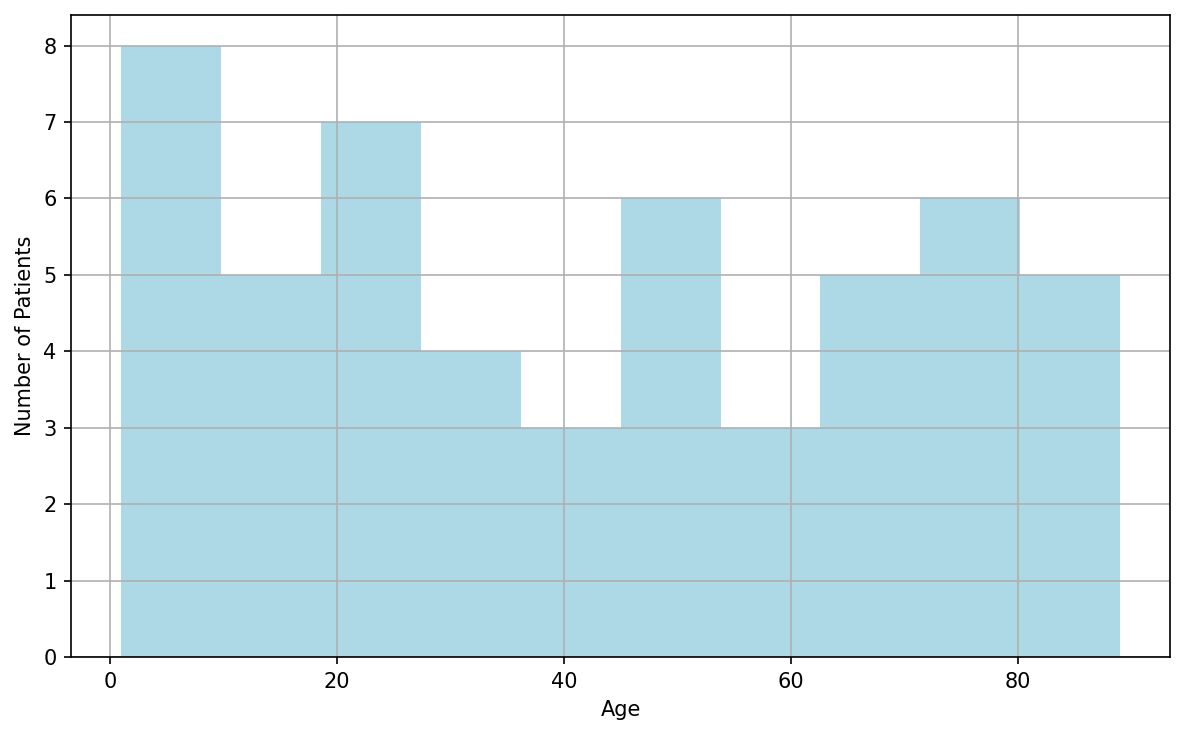

In [189]:
plt.figure(figsize=(8,5),dpi=150)
df['Age'].hist(bins=10, color='lightblue')
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.savefig("age_distribution.png")
plt.tight_layout()
plt.show()

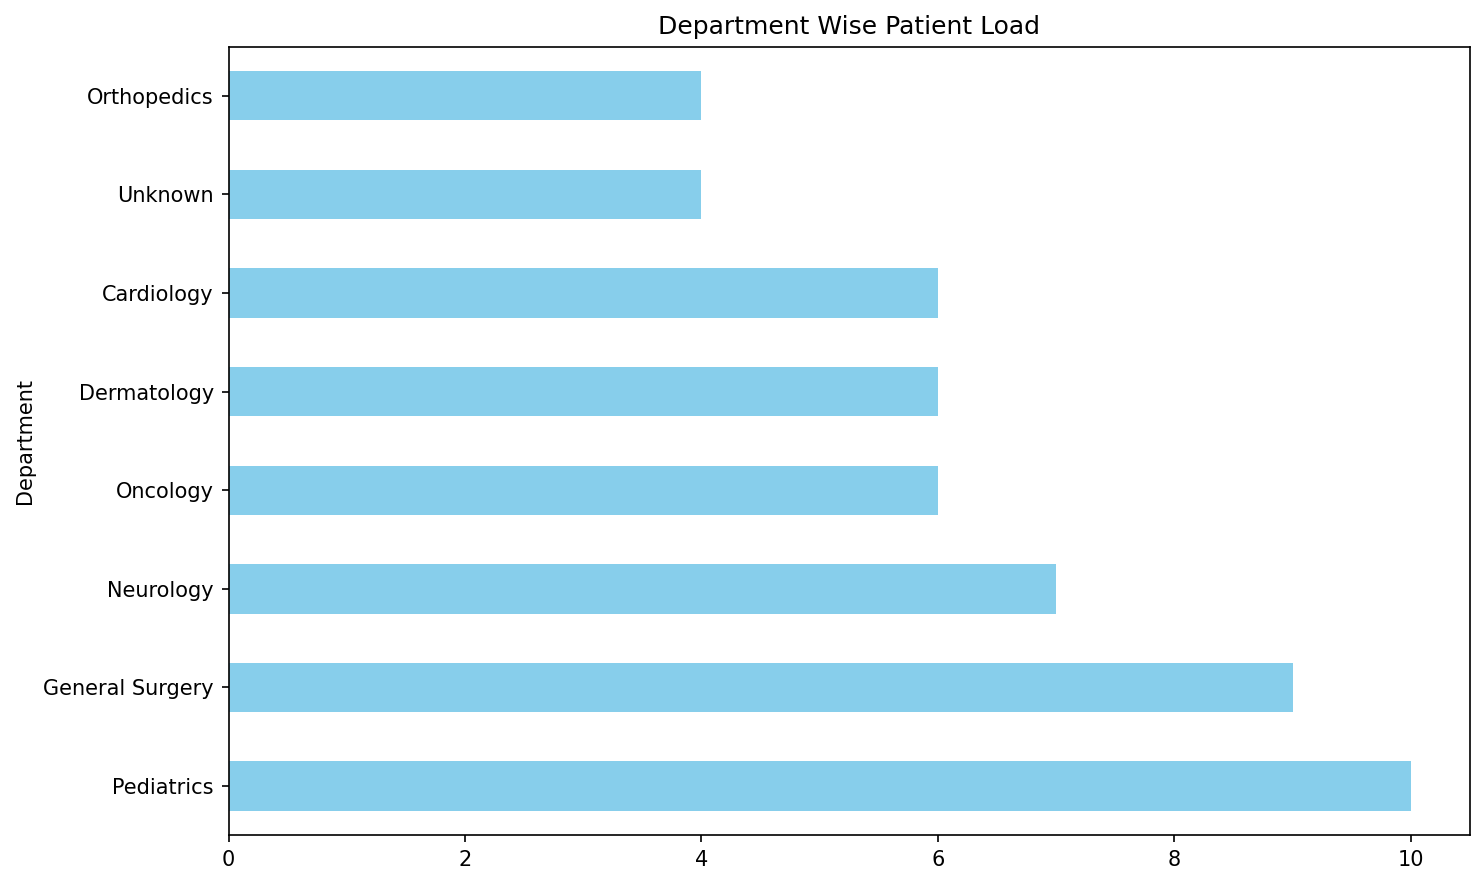

In [190]:
plt.figure(figsize=(10,6), dpi=150)
df['Department'].value_counts().plot(kind='barh', color='skyblue')
plt.title('Department Wise Patient Load')
plt.tight_layout()
plt.savefig('dept_load.png')  
plt.show()
plt.close()

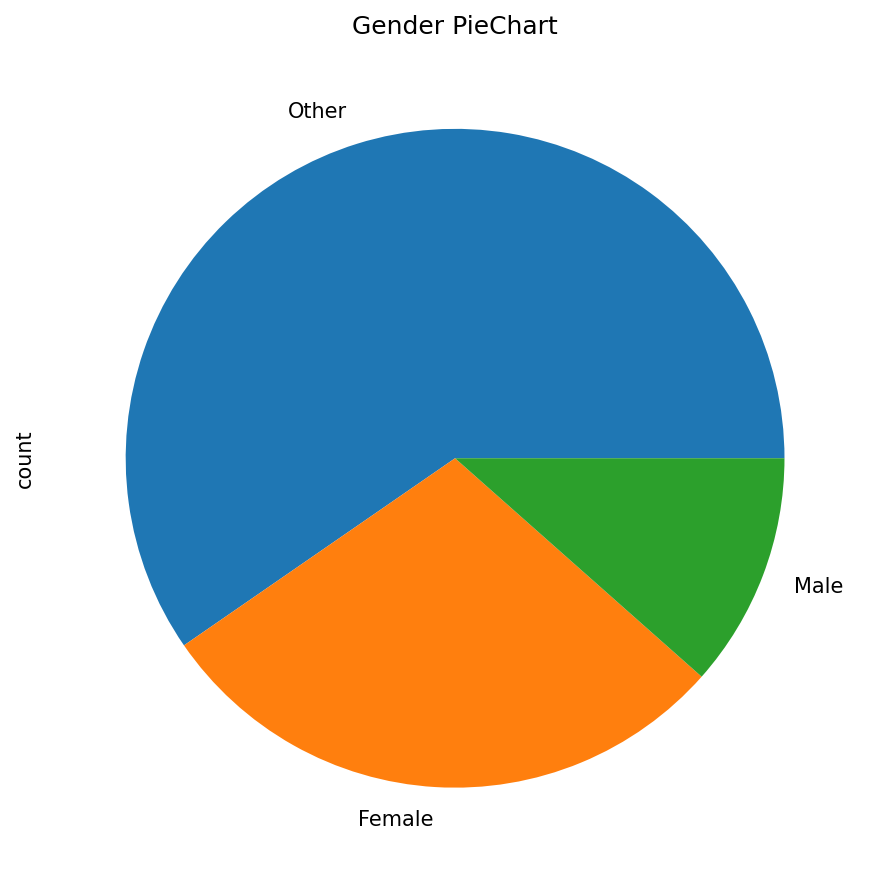

In [202]:
plt.figure(figsize=(10,6), dpi= 150)
df["Gender"].value_counts().plot(kind="pie", color="skyblue")
plt.title("Gender PieChart")
plt.tight_layout()
plt.savefig("Genderpiechart.png")


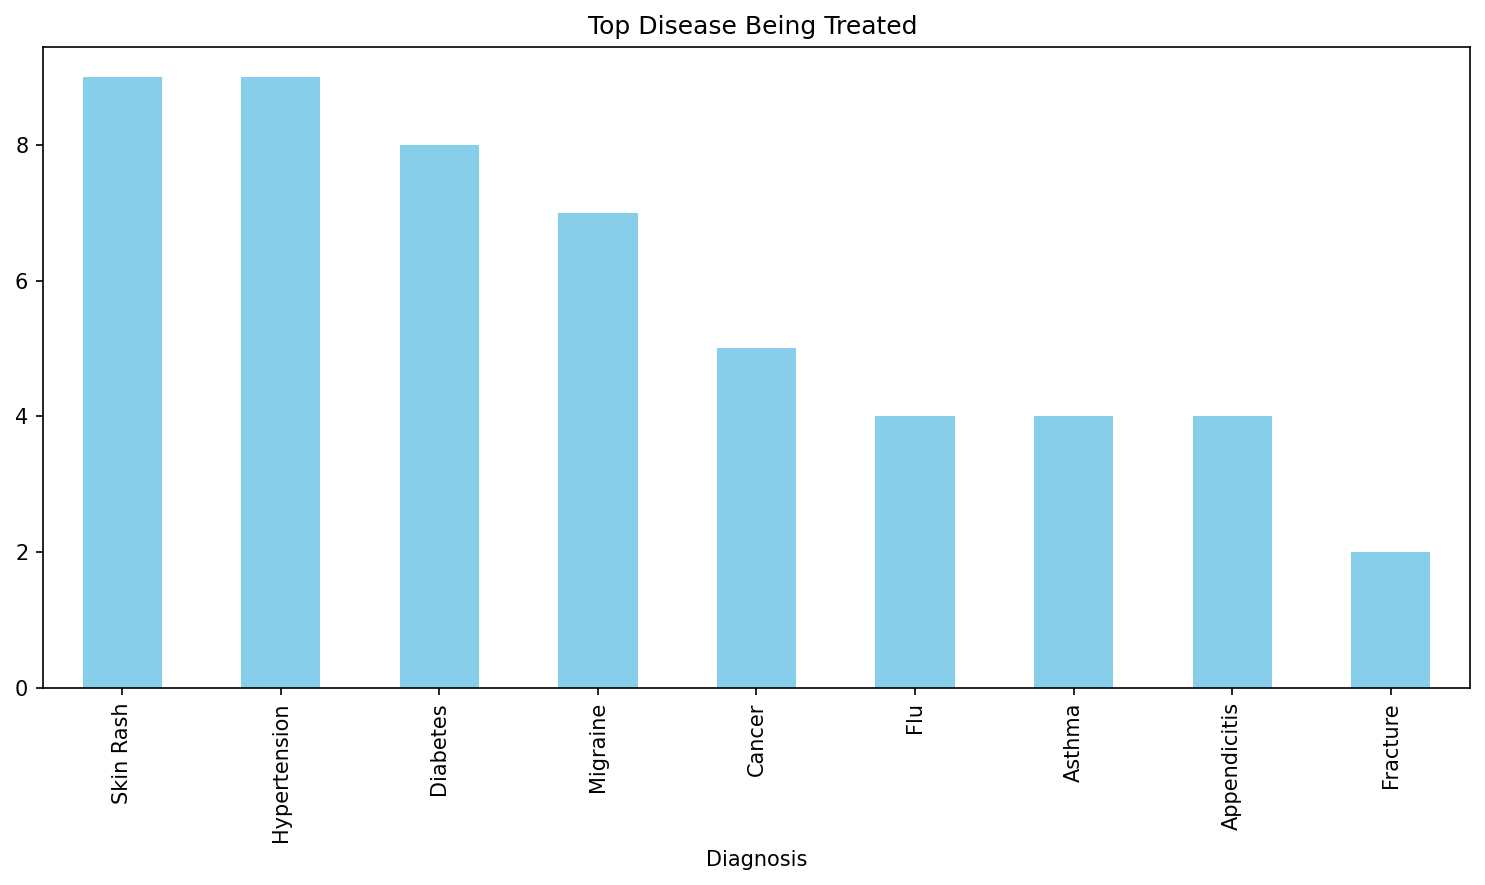

In [197]:
plt.figure(figsize=(10,6), dpi= 150)
df["Diagnosis"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Top Disease Being Treated ")
plt.tight_layout()
plt.savefig("DFbarchar.png")


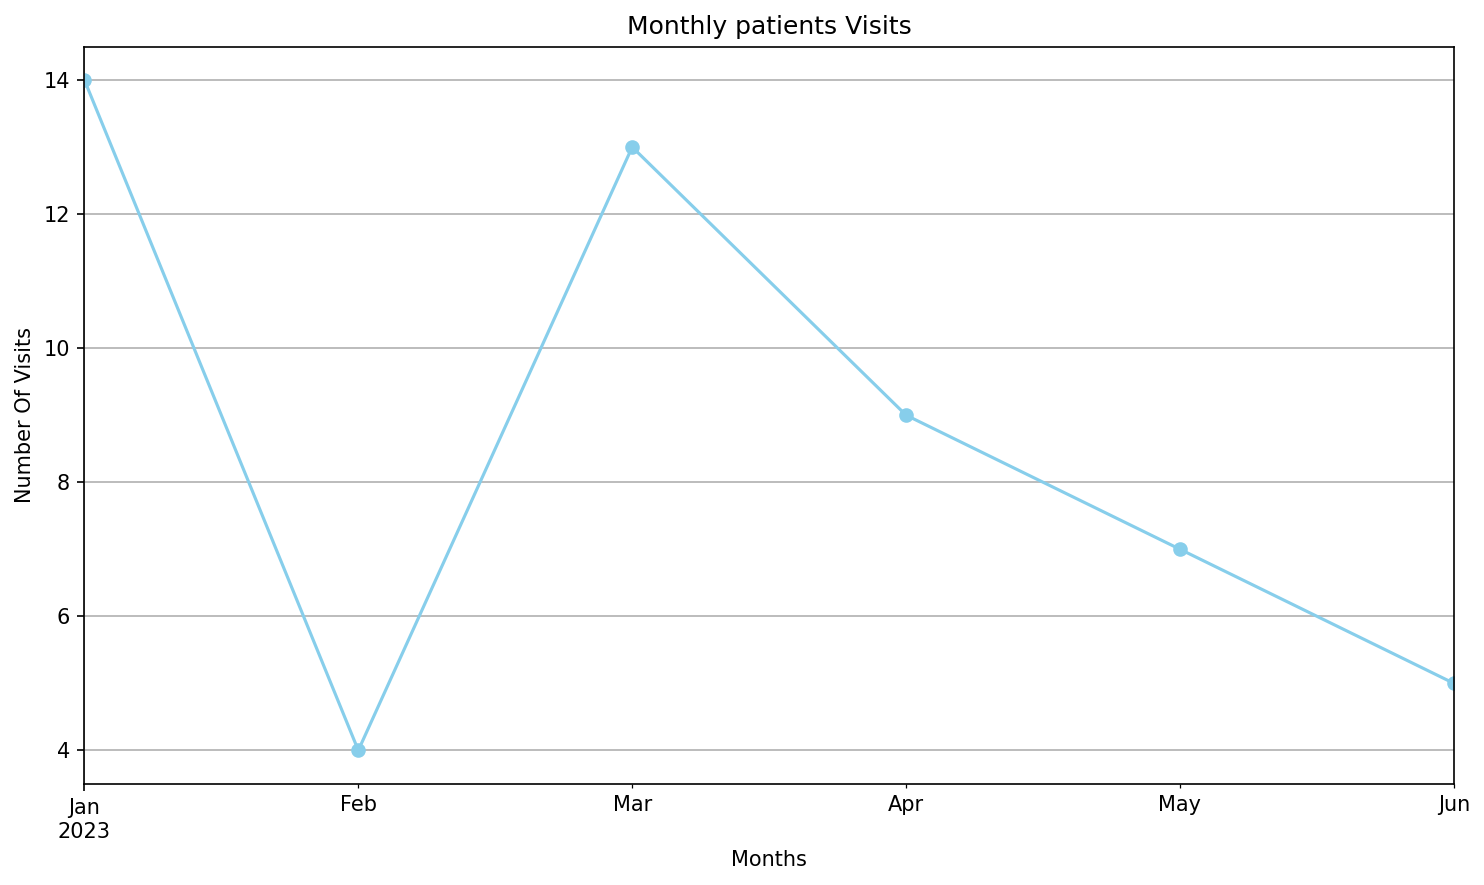

In [196]:
plt.figure(figsize=(10,6),dpi = 150)
monthly_visits.plot(kind="line", marker="o", color="skyblue") 
plt.title("Monthly patients Visits")
plt.xlabel("Months")
plt.ylabel("Number Of Visits")
plt.grid(True)
plt.tight_layout()
plt.savefig("MonthlyVisits.png")
plt.show()


In [216]:
import pandas as pd
from openpyxl import Workbook
from openpyxl.drawing.image import Image
from openpyxl.utils.dataframe import dataframe_to_rows



wb = Workbook()

ws_dashboard = wb.active
ws_dashboard.title = "Dashboard"

ws_dashboard['A1'] = 'Hospital Analytics Dashboard'


ws_dashboard.add_image(Image('dept_load.png'), 'A3')
ws_dashboard.add_image(Image('age_distribution.png'), 'A30')
ws_dashboard.add_image(Image('MonthlyVisits.png'), 'A57')
ws_dashboard.add_image(Image('Genderpiechart.png'), 'A84')
ws_dashboard.add_image(Image('DFbarchar.png'), 'A111')

ws_data = wb.create_sheet(title="Cleaned Data")


if 'Visit_Month' in df.columns:
    df['Visit_Month'] = df['Visit_Month'].astype(str)


for r in dataframe_to_rows(df, index=False, header=True):
    ws_data.append(r)

ws_summary = wb.create_sheet(title="Summary Stats")

ws_summary['A1'] = 'Hospital Data Summary Metrics'
ws_summary['A3'] = 'Total Patients'
ws_summary['B3'] = t_patients
ws_summary['A4'] = 'Average Patient Age'
ws_summary['B4'] = round(average_age, 2)
ws_summary['A5'] = 'Total Revenue'
ws_summary['B5'] = t_revenue
ws_summary['A6'] = 'Average Bill Amount'
ws_summary['B6'] = round(Average_billamount, 2)


wb.save('Hospital_Data_Report_Final.xlsx')
